In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('dataset.txt', sep = ',', index_col=False)
df.columns = ["housesize", "rooms", "price"]
df.head()

,housesize,rooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [20]:
# Normalize
def normalize(df):
    for i in range(0, df.shape[1]-1):
        df[:, i] = (df[:, i] - np.mean(df[:, i]))/np.std(df[:, i])

In [23]:
def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:,0], y, 'bo')
    plt.show()

In [43]:
def dataset(df):
    data = np.array(df, dtype=float)
    plot_data(data[:,0:2], data[:, -1])
    normalize(data)
    return data[:, 0:2], data[:, -1]

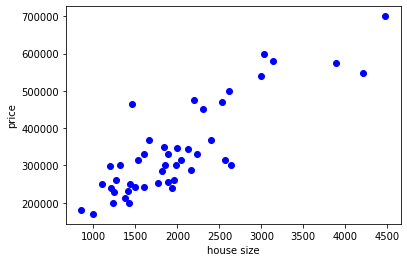

In [67]:
X_train, y_train = dataset(df)
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
y_train = np.reshape(y_train, (46,1))

In [71]:
def h(x, theta):
    return x@theta

In [76]:
def cost_function(x, y, theta):
    result = ((y-h(x, theta)).T @ (y-h(x, theta)))/(2*y_train.shape[0])
    return result

In [88]:
def gradient_descent(x, y, theta, lr = 0.1, epoch = 10):
    n = x.shape[0]
    J_all = []
    
    for i in range(epoch):
        h_x = h(x, theta)
        dr_cost = (x.T @ (h_x-y))/n
        theta = theta - lr*dr_cost
        J_all.append(cost_function(x, y, theta))
    return theta, J_all 

In [90]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

Cost:  [[2.06669066e+09]]
Parameters:  [[339110.44903458]
 [109594.77707842]
 [ -5572.08655189]]


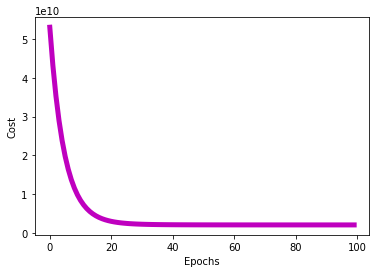

In [95]:
# x,y = load_data("house_price_data.txt")
# y = np.reshape(y, (46,1))
# x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((X_train.shape[1], 1))
learning_rate = 0.1
num_epochs = 100
theta, J_all = gradient_descent(X_train, y_train, theta, learning_rate, num_epochs)
J = cost_function(X_train, y_train, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

# test(theta, [1600, 2])